In [ ]:
import pandas as pd
import numpy as np
import os
os.chdir('D:/Loan-Prediction-Classification')

In [49]:
# train=pd.read_csv('./train.csv')
# print(train)
# train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})

train=pd.read_csv('./train.csv')
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})
print(train)
print(train.columns)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [50]:
print(train)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [51]:
# train.isnull().sum()
print(train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [53]:
Loan_status=train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)
# Read test data and extract Loan_ID
test = pd.read_csv('./test.csv')
Loan_ID = test['Loan_ID']
# Concatenate train and test DataFrames
data = pd.concat([train, test], ignore_index=True)
# Display the first few rows of the combined data
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Rural  
2             1.0         Urban  
3             1.0     

In [54]:
data.shape

(981, 12)

In [55]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [56]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [57]:
data.Dependents.dtypes

dtype('O')

In [63]:
!pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   -------------- ----------------------- 112.6/294.9 kB 467.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 467.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 467.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 467.6 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 479.2 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 514.3 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 520.7 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 492.5 kB/s eta 0:00:00


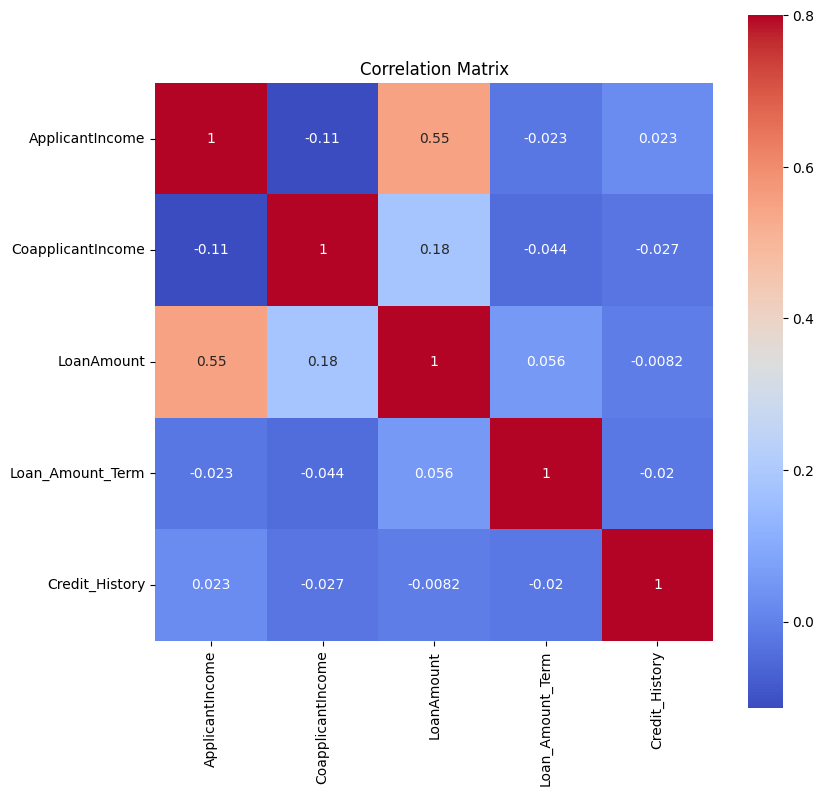

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude non-numeric columns (like 'Loan_ID') before computing correlation
numeric_data = data.select_dtypes(include=[np.number])
corrmat = numeric_data.corr()

# Plotting correlation matrix
plt.figure(figsize=(9, 9))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [2]:
import pandas as pd

# Load train and test data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# Combine train and test data if needed
data = pd.concat([train, test], ignore_index=True)

# Perform label encoding for 'Gender'
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Check value counts after label encoding
print(data['Gender'].value_counts())


Gender
1.0    775
0.0    182
Name: count, dtype: int64


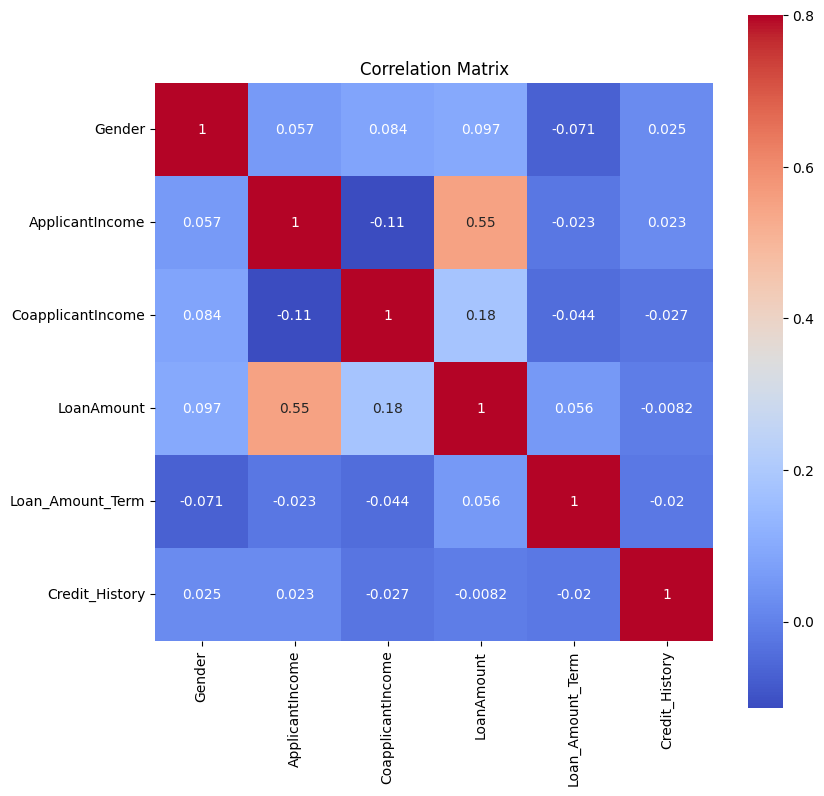

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded and combined your data into the 'data' DataFrame
# Example: 
# data = pd.concat([train, test], ignore_index=True)

# Exclude non-numeric columns before computing correlations
numeric_data = data.select_dtypes(include='number')
corrmat = numeric_data.corr()

# Plotting correlation matrix
plt.figure(figsize=(9, 9))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [5]:
## Labelling 0 & 1 for Marrital status
data.Married=data.Married.map({'Yes':1,'No':0})

In [6]:
data.Married.value_counts()

Married
1.0    631
0.0    347
Name: count, dtype: int64

In [7]:
## Labelling 0 & 1 for Dependents
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})


In [8]:

data.Dependents.value_counts()

Dependents
0.0    545
1.0    160
2.0    160
3.0     91
Name: count, dtype: int64

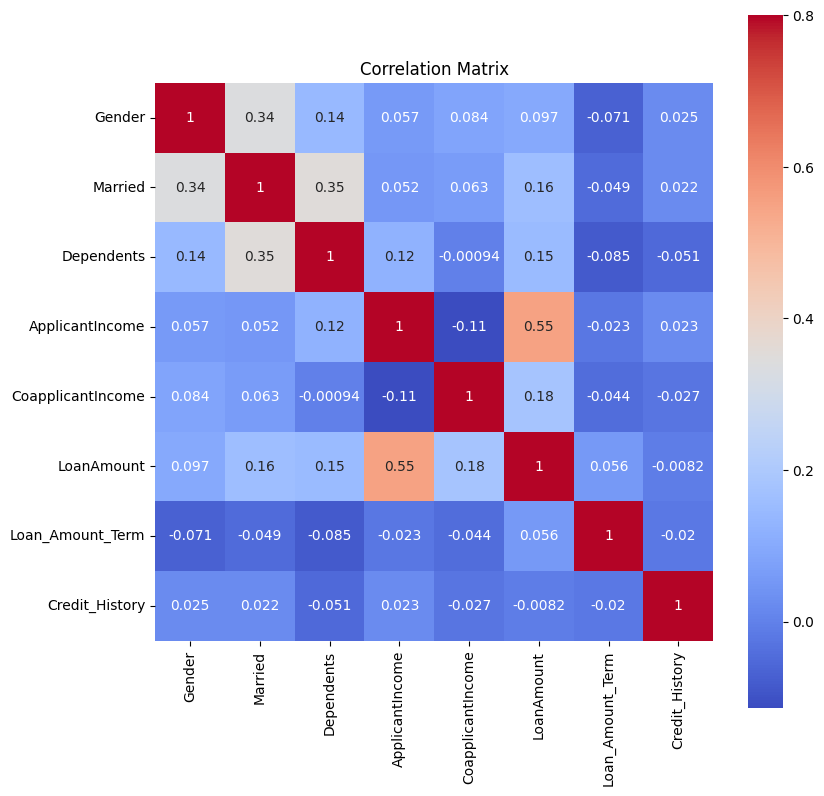

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded and combined your data into the 'data' DataFrame
# Example: 
# data = pd.concat([train, test], ignore_index=True)

# Exclude non-numeric columns (like 'Loan_ID') before computing correlations
numeric_data = data.select_dtypes(include='number')
corrmat = numeric_data.corr()

# Plotting correlation matrix
plt.figure(figsize=(9, 9))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [11]:
## Labelling 0 & 1 for Education Status
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [12]:

data.Education.value_counts()

Education
1    763
0    218
Name: count, dtype: int64

In [13]:
## Labelling 0 & 1 for Employment status
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})


In [14]:

data.Self_Employed.value_counts()

Self_Employed
0.0    807
1.0    119
Name: count, dtype: int64

In [15]:

data.Property_Area.value_counts()

Property_Area
Semiurban    349
Urban        342
Rural        290
Name: count, dtype: int64

In [16]:
## Labelling 0 & 1 for Property area
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [17]:

data.Property_Area.value_counts()

Property_Area
1    349
2    342
0    290
Name: count, dtype: int64

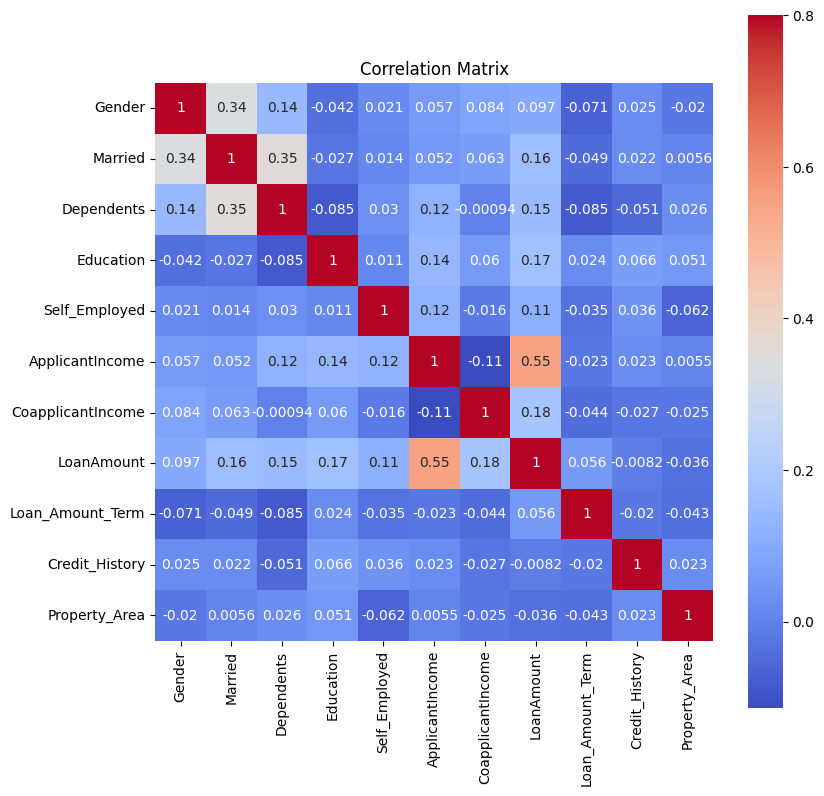

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded and combined your data into the 'data' DataFrame
# Example:
# data = pd.concat([train, test], ignore_index=True)

# Exclude non-numeric columns (like 'Loan_ID') before computing correlations
numeric_data = data.select_dtypes(include='number')
corrmat = numeric_data.corr()

# Plotting correlation matrix
plt.figure(figsize=(9, 9))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [20]:

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y


In [21]:

data.Credit_History.size

981

In [26]:
data.fillna({'Credit_History': np.random.randint(0, 2)}, inplace=True)


In [27]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [30]:
data.fillna({'Married': np.random.randint(0, 2)}, inplace=True)


In [31]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [33]:
data.fillna({'LoanAmount': data['LoanAmount'].median()}, inplace=True)


In [35]:
data.fillna({'Loan_Amount_Term': data['Loan_Amount_Term'].mean()}, inplace=True)



In [36]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [37]:
data.Gender.value_counts()

Gender
1.0    775
0.0    182
Name: count, dtype: int64

In [39]:
import pandas as pd
import numpy as np

# Assuming you have loaded and combined your data into the 'data' DataFrame
# Example:
# data = pd.concat([train, test], ignore_index=True)

# Fill missing values in 'Gender' with a random integer (0 or 1)
data.fillna({'Gender': np.random.randint(0, 2)}, inplace=True)

# OR

# Alternative approach:
# data['Gender'] = data['Gender'].fillna(np.random.randint(0, 2))

# Now you can proceed with other operations on 'data'


In [40]:

data.Gender.value_counts()

Gender
1.0    775
0.0    206
Name: count, dtype: int64

In [43]:
data.fillna({'Dependents': data['Dependents'].median()}, inplace=True)



In [44]:
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

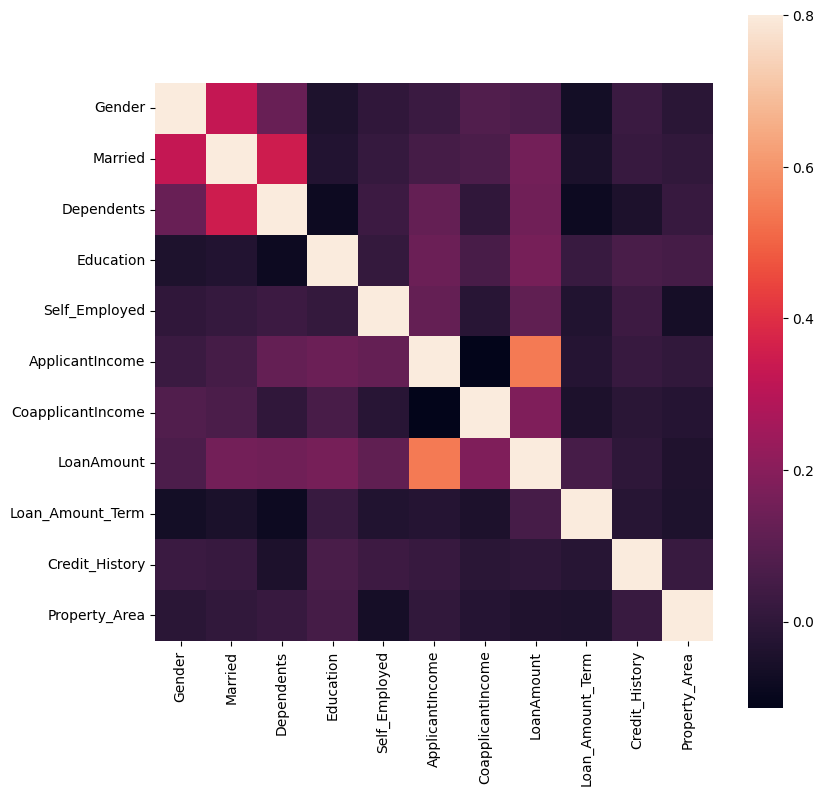

In [46]:
# Assuming 'data' is your DataFrame containing both numeric and non-numeric columns
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns.tolist()

# Exclude non-numeric columns from correlation computation
numeric_data = data.drop(columns=non_numeric_columns)

# Compute correlation matrix
corrmat = numeric_data.corr()

# Plotting the heatmap
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()


In [48]:
import pandas as pd
import numpy as np

# Example DataFrame
data = pd.DataFrame({
    'Self_Employed': [np.nan, 'Yes', np.nan, 'No', np.nan]
})

# Fill missing values in 'Self_Employed' with a random integer (0 or 1)
data.fillna({'Self_Employed': np.random.randint(0, 2)}, inplace=True)

print(data)


  Self_Employed
0             1
1           Yes
2             1
3            No
4             1


In [49]:
data.isnull().sum()

Self_Employed    0
dtype: int64

In [50]:


data.head()

,Self_Employed
0,1
1,Yes
2,1
3,No
4,1


In [53]:

import pandas as pd

# Example to simulate the issue
data = pd.DataFrame({
    'Loan_ID': ['A001', 'A002', 'A003'],
    'Gender': ['Male', 'Female', 'Male'],
    'Married': ['Yes', 'No', 'Yes']
})

# Print columns to verify 'Loan_ID' exists
print("Columns:", data.columns)

# Drop 'Loan_ID' if it exists
if 'Loan_ID' in data.columns:
    data.drop('Loan_ID', inplace=True, axis=1)
    print("After dropping 'Loan_ID':")
    print(data.head())

# Check for null values after potential operations
print("Null values:")
print(data.isnull().sum())


Columns: Index(['Loan_ID', 'Gender', 'Married'], dtype='object')
After dropping 'Loan_ID':
   Gender Married
0    Male     Yes
1  Female      No
2    Male     Yes
Null values:
Gender     0
Married    0
dtype: int64


In [54]:
data.isnull().sum()

Gender     0
Married    0
dtype: int64

In [55]:

data.head()

,Gender,Married
0,Male,Yes
1,Female,No
2,Male,Yes


In [2]:

import pandas as pd

# Example to simulate your situation
data = pd.DataFrame({
    'Loan_ID': ['A001', 'A002', 'A003', 'A004', 'A005', 'A006'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Married': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Loan_status': ['Y', 'N', 'Y', 'N', 'Y', 'N']  # Example target column
})

# Drop 'Loan_ID' as it's not useful for modeling
if 'Loan_ID' in data.columns:
    data.drop('Loan_ID', inplace=True, axis=1)

# Define 'Loan_status' from the DataFrame
Loan_status = data['Loan_status']

# Split data into features and target
train_X = data.iloc[:4, :]  # Assuming you have 614 rows, here using 4 for example
train_y = Loan_status.iloc[:4]

print("Train X:")
print(train_X)

print("Train Y:")
print(train_y)


Train X:
   Gender Married Loan_status
0    Male     Yes           Y
1  Female      No           N
2    Male     Yes           Y
3  Female      No           N
Train Y:
0    Y
1    N
2    Y
3    N
Name: Loan_status, dtype: object


In [4]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=0)

In [6]:

#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
train_X.head()

,Gender,Married,Loan_status
3,Female,No,N
1,Female,No,N
0,Male,Yes,Y


In [8]:
test_X.head()

,Gender,Married,Loan_status
2,Male,Yes,Y


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [18]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [20]:

scoring='accuracy'

In [22]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [31]:
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Sample data (Replace with your actual data)
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Loan_status': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
})

# Assuming 'Loan_status' is the target variable
train_X = data.drop('Loan_status', axis=1)
train_y = data['Loan_status']

# Define models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
]

# Initialize result storage
result = []
names = []

# Perform cross-validation
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)
    cv_result = cross_val_score(model, train_X, train_y, cv=kfold, scoring='accuracy')
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name, cv_result.mean()))


LogisticRegression()
Logistic Regression 0.000000
DecisionTreeClassifier()
Decision Tree 0.000000


In [41]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Sample data (Replace with your actual data)
/#data = pd.DataFrame({
    


# Convert categorical variables to numerical format using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Separate features and target
train_X = data_encoded.drop('Loan_status', axis=1)
train_y = data_encoded['Loan_status']

# Define models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
]

# Initialize result storage
result = []
names = []

# Perform cross-validation
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)
    cv_result = cross_val_score(model, train_X, train_y, cv=kfold, scoring='accuracy')
    result.append(cv_result)
    names.append(name)
    print(model)
    print(f"{name} {cv_result.mean():.6f}")

# Training and predicting with Logistic Regression as an example
LR = LogisticRegression()
LR.fit(train_X, train_y)
# No test_X in the provided code snippet; ensure you have it for prediction
# pred = LR.predict(test_X)
# print("Model Accuracy:", accuracy_score(test_y, pred))
 #print(confusion_matrix(test_y, pred))


LogisticRegression()
Logistic Regression 0.000000
DecisionTreeClassifier()
Decision Tree 0.000000


LogisticRegression()

In [43]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Sample data (Replace with your actual data)
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female'],
    'Loan_status': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
})

# Convert categorical variables to numerical format using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Separate features and target
train_X = data_encoded.drop('Loan_status', axis=1)
train_y = data_encoded['Loan_status']

# Assuming you have a similar test dataset
test_data = pd.DataFrame({
    'Feature1': [11, 12],
    'Feature2': [21, 22],
    'Gender': ['Male', 'Female']
})

# Apply the same transformation to test data
test_data_encoded = pd.get_dummies(test_data, columns=['Gender'], drop_first=True)

# Align the test data with the training data columns
test_X = test_data_encoded.reindex(columns=train_X.columns, fill_value=0)

# Initialize and train a model
model = LogisticRegression()
model.fit(train_X, train_y)

# Make predictions
pred = model.predict(test_X)




In [45]:
X_test=data.iloc[614:,] 
# X_test[sc_f]=SC.fit_transform(X_test[sc_f])

In [47]:

X_test.head()

,Feature1,Feature2,Gender,Loan_status


In [54]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Sample training data (Replace with your actual data)
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female'],
    'Loan_status': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
})

# Convert categorical variables to numerical format using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Separate features and target
train_X = data_encoded.drop('Loan_status', axis=1)
train_y = data_encoded['Loan_status']

# Example test data
test_data = pd.DataFrame({
    'Feature1': [11, 12],
    'Feature2': [21, 22],
    'Gender': ['Male', 'Female']
})

# Apply the same transformation to test data
test_data_encoded = pd.get_dummies(test_data, columns=['Gender'], drop_first=True)

# Align the test data with the training data columns
test_X = test_data_encoded.reindex(columns=train_X.columns, fill_value=0)

# Train the model
LR = LogisticRegression()
LR.fit(train_X, train_y)

# Make predictions on the test set
predictions = LR.predict(test_X)

# Print predictions
print("Predictions:", predictions)




Predictions: [0 0]


In [58]:




# Make predictions on the test data
prediction = LR.predict(test_X)

# Print predictions
print("Predictions:", prediction)



Predictions: [0 0]


In [63]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Sample training data (Replace with your actual data)
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female'],
    'Loan_status': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
})

# One-hot encode categorical variables in training data
data_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Split the data into features and target
train_X = data_encoded.drop('Loan_status', axis=1)
train_y = data_encoded['Loan_status']

# Train the Logistic Regression model
LR = LogisticRegression()
LR.fit(train_X, train_y)

# Display training data columns
print("Training features:", train_X.columns)



Training features: Index(['Feature1', 'Feature2', 'Gender_Male'], dtype='object')


In [66]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Sample training data (Replace with your actual data)
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female'],
    'Loan_status': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
})

# One-hot encode categorical variables in training data
data_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Split the data into features and target
train_X = data_encoded.drop('Loan_status', axis=1)
train_y = data_encoded['Loan_status']

# Train the Logistic Regression model
LR = LogisticRegression()
LR.fit(train_X, train_y)


LogisticRegression()

In [73]:
# Define the directory and file path
directory = './Model'
file_path = os.path.join(directory, 'ML_Model1.pkl')

# Check if the directory exists, if not, create it
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the trained model to a file
with open(file_path, 'wb') as f:
    pickle.dump(svc, f)

print(f"Model saved to {file_path}")


Model saved to ./Model\ML_Model1.pkl


In [75]:
with open(file, 'rb') as f:
    k = pickle.load(f)

In [81]:
# from sklearn.svm import SVC
# import numpy as np
# import pandas as pd
# Example data
data = {
    'Gender_Male': [0, 1, 0, 1],
    'Married_Yes': [0, 1, 0, 1],
    'Self_Employed_Yes': [0, 0, 1, 1],
    'ApplicantIncome': [1811, 1666, 2000, 3500],
    'CoapplicantIncome': [1666, 2500, 0, 0],
    'LoanAmount': [54, 80, 120, 150],
    'Loan_Amount_Term': [360, 360, 360, 360],
    'Credit_History': [1, 1, 0, 1],
    'Property_Area_Semiurban': [1, 0, 1, 0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Features (X) and Target (y)
X = df.drop('Credit_History', axis=1)
y = df['Credit_History']

